In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from fipy import Grid1D, CellVariable
from fipy import TransientTerm, DiffusionTerm

In [3]:
L = 10.
Nx = 200
dx = L/Nx
Ti = 0.
Tx = 100.

In [4]:
msh = Grid1D(nx=Nx, dx=dx)

In [5]:
xco, = msh.cellCenters

In [6]:
# check cell coordinates
# plt.plot(xco)

In [7]:
T = CellVariable(mesh = msh, name = 'T')

In [8]:
T[0] = Tx
T[1:] = Ti

In [9]:
eqn = TransientTerm(var=T) == DiffusionTerm(coeff=1.0, var=T)

In [10]:
t = 0
deltat = 0.025
Nsteps = 2000

In [11]:
Tright = np.zeros(Nsteps)
Tleft = np.zeros(Nsteps)
tt = np.arange(Nsteps) * deltat

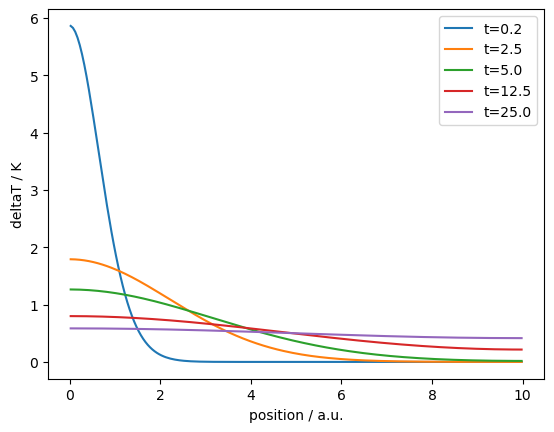

In [12]:
displist = [10, 100, 200, 500, 1000]
for i in range(2000):
    Tright[i] = T.value[-1]
    Tleft[i] = T.value[0]
    if i in displist:
        plt.plot(xco, T.value, label = 't={0:.1f}'.format(t))
    eqn.solve(dt = deltat); t+=deltat
plt.xlabel('position / a.u.')
plt.ylabel('deltaT / K')
plt.legend()

Text(0, 0.5, 'deltaT(left side) / K')

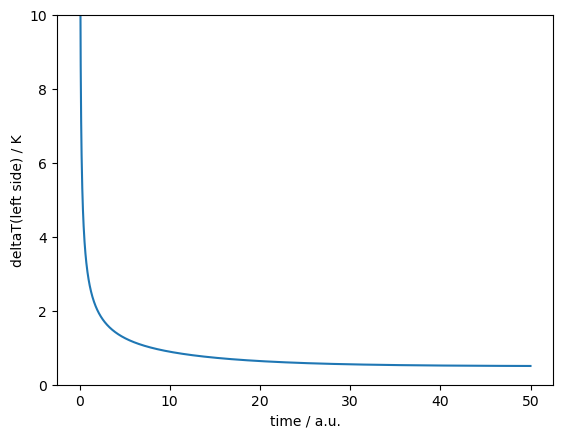

In [13]:
plt.plot(tt,Tleft)
plt.ylim(0,10)
plt.xlabel('time / a.u.')
plt.ylabel('deltaT(left side) / K')

Text(0, 0.5, 'deltaT(right side) / K')

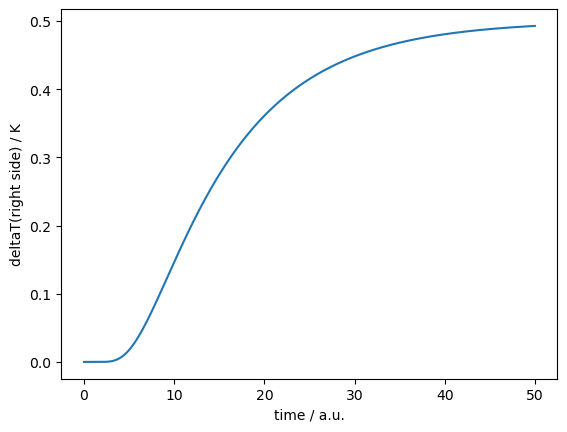

In [14]:
plt.plot(tt,Tright)
plt.xlabel('time / a.u.')
plt.ylabel('deltaT(right side) / K')

In [15]:
T.value.sum()

99.99999999977489